# Importing the necessary libraries 

In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Create a quantum device for 2 qubits

In [2]:
dev = qml.device("default.qubit", wires=2)

# Define Bell State circuit to get probabilities

In [3]:

@qml.qnode(dev)
def bell_state_circuit():
    qml.Hadamard(wires=0)     # Put qubit 0 in superposition
    qml.CNOT(wires=[0, 1])    
    return qml.probs(wires=[0, 1])

# Run circuit

In [4]:
probs = bell_state_circuit()
print(qml.draw(bell_state_circuit)())

print("🔹 Probability distribution:")
for i, p in enumerate(probs):
    print(f"State |{i:02b}>: {p:.4f}")

0: ──H─╭●─┤ ╭Probs
1: ────╰X─┤ ╰Probs
🔹 Probability distribution:
State |00>: 0.5000
State |01>: 0.0000
State |10>: 0.0000
State |11>: 0.5000


# Plot probability distribution

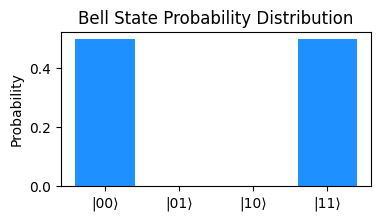

In [15]:

plt.figure(figsize=(4,2))
plt.bar([f"|{i:02b}⟩" for i in range(4)], probs, color='dodgerblue')
plt.title("Bell State Probability Distribution")
plt.ylabel("Probability")
plt.show()

 # Get the exact statevector

In [6]:
@qml.qnode(dev)
def bell_state_statevector():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state()

In [7]:
state = bell_state_statevector()
print("\n🔹 Statevector:")
print(state)


🔹 Statevector:
[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


# Plot absolute value of statevector amplitudes 

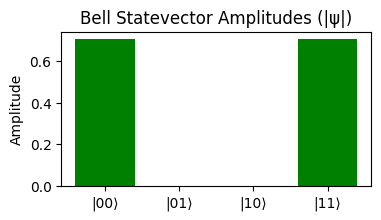

In [16]:
plt.figure(figsize=(4,2))
plt.bar([f"|{i:02b}⟩" for i in range(4)], np.abs(state), color='green')
plt.title("Bell Statevector Amplitudes (|ψ|)")
plt.ylabel("Amplitude")
plt.show()

In [9]:
dev_sample = qml.device("default.qubit", wires=2, shots=1000)


In [10]:
@qml.qnode(dev_sample)
def bell_state_sampling():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(wires=[0, 1])

In [11]:
samples = bell_state_sampling()

In [12]:
# Count outcomes
counts = Counter([tuple(s) for s in samples])

In [13]:
print("\n🔹 Measurement samples (from 1000 shots):")
for outcome in sorted(counts):
    print(f"{outcome}: {counts[outcome]}")


🔹 Measurement samples (from 1000 shots):
(np.int64(0), np.int64(0)): 506
(np.int64(1), np.int64(1)): 494


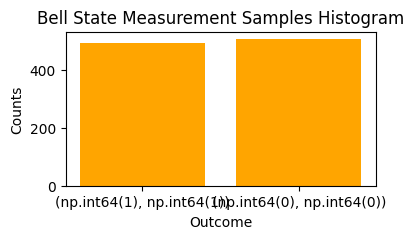

In [ ]:
# Plot histogram of measurement outcomes
plt.figure(figsize=(4,2))
plt.bar([str(k) for k in counts.keys()], counts.values(), color='orange')
plt.title("Bell State Measurement Samples Histogram")
plt.xlabel("Outcome")
plt.ylabel("Counts")
plt.show()